In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentDataset.csv')

In [35]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Catagory
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Detractor
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Detractor
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor


In [49]:
siz = len(df["Rating (Num)"])
app = []
nps = 0
promotors = 0
detractors = 0
passives = 0
nps = 0
for i in range(siz):
    check = df["Rating (Num)"][i]
    
    if check >= '0' and check <= '6':
        app.append("Detractor")
        detractors += 1
    elif check == '7' or check == '8':
        app.append("Passive")
        passives += 1
    elif check == '9' or check == '10':
        app.append("Promotor")
        promotors += 1
    else:
        app.append("None")
        
nps = (promotors - detractors) / (promotors + passives + detractors)

print(promotors)
print(detractors)
print(df["Rating (Num)"].value_counts())

print(nps)
df["Catagory"] = app

384
497
8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
2            2
1            2
0            2
Name: Rating (Num), dtype: int64
-0.07793103448275862


### NPS
-0.07793103448275862

In [36]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Catagory
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Detractor
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Detractor
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor


### How many more promoters are there than detractors across our 2017 data?

In [7]:
df["Catagory"].value_counts()

Passive      569
Detractor    497
Promotor     384
None           3
Name: Catagory, dtype: int64

In [11]:
df["Catagory"].value_counts()["Promotor"] - df["Catagory"].value_counts()["Detractor"]

-113

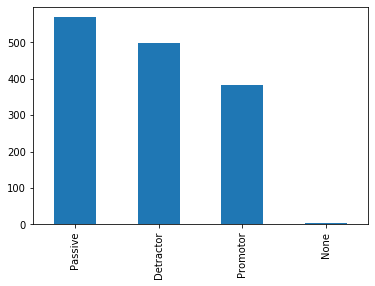

In [9]:
df["Catagory"].value_counts().plot(kind="bar")

### There are 113 more detractors than there are promotors

### Which track boasts the best promoter-to-detractor ratio?

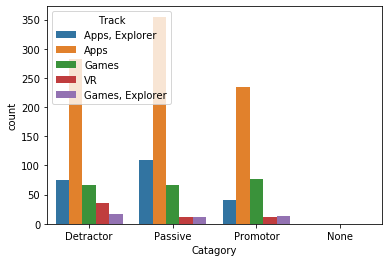

In [12]:
sns.countplot(x='Catagory', hue='Track', data=df)

In [13]:
df["Track"].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

In [41]:
ls = ["Apps", "Apps, Explorer", "Games", "VR", "Games, Explorer"]
for a in ls:
    print(a)
    temp = df[df["Track"] == a]["Catagory"].value_counts()
    print(temp["Promotor"], end=" : ")
    print(temp["Detractor"])
    print(temp["Promotor"] / temp["Promotor"], end=" to ")
    print(temp["Detractor"] / temp["Promotor"])
    print("Total students:", end=" ")
    print(temp.sum())
    print()
print("Promotor to Detractor ratios")

Apps
234 : 282
1.0 to 1.205128205128205
Total students: 871

Apps, Explorer
40 : 75
1.0 to 1.875
Total students: 224

Games
76 : 66
1.0 to 0.868421052631579
Total students: 208

VR
12 : 36
1.0 to 3.0
Total students: 60

Games, Explorer
14 : 17
1.0 to 1.2142857142857142
Total students: 43

Promotor to Detractor ratios


### Games and Apps have the best Detractor to Promotor ratios

Games has more promotors per detractor, while apps has the smallest ratio between the amount of detractors per promotor.

### Does the student experience get better the longer that they are enrolled at the Summer Academy?

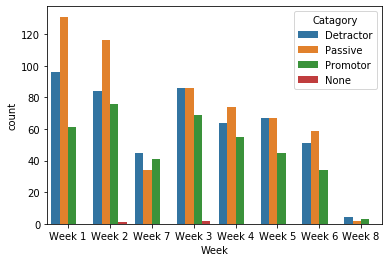

In [32]:
sns.countplot(x='Week', hue='Catagory', data=df)

In [16]:
ls = ["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8"]
for a in ls:
    print(a)
    temp = df[df["Week"] == a]["Catagory"].value_counts()
    print(temp)
    print("% Passive:", end=" ")
    print((temp["Passive"] / temp.sum()) * 100)
    print("% Promotor:", end=" ")
    print((temp["Promotor"] / temp.sum()) * 100)
    print("% Detractor:", end=" ")
    print((temp["Detractor"] / temp.sum()) * 100)
    print(temp["Promotor"] / temp["Promotor"], end=" to ")
    print(temp["Detractor"] / temp["Promotor"])
    print()

Week 1
Passive      131
Detractor     96
Promotor      61
Name: Catagory, dtype: int64
% Passive: 45.48611111111111
% Promotor: 21.180555555555554
% Detractor: 33.33333333333333
1.0 to 1.5737704918032787

Week 2
Passive      116
Detractor     84
Promotor      76
None           1
Name: Catagory, dtype: int64
% Passive: 41.87725631768953
% Promotor: 27.436823104693143
% Detractor: 30.324909747292416
1.0 to 1.105263157894737

Week 3
Detractor    86
Passive      86
Promotor     69
None          2
Name: Catagory, dtype: int64
% Passive: 35.390946502057616
% Promotor: 28.39506172839506
% Detractor: 35.390946502057616
1.0 to 1.2463768115942029

Week 4
Passive      74
Detractor    64
Promotor     55
Name: Catagory, dtype: int64
% Passive: 38.34196891191709
% Promotor: 28.497409326424872
% Detractor: 33.160621761658035
1.0 to 1.1636363636363636

Week 5
Detractor    67
Passive      67
Promotor     45
Name: Catagory, dtype: int64
% Passive: 37.43016759776536
% Promotor: 25.139664804469277
% Detra

On average people become less passive the longer they stay, but the overal trend of having more detractors than promotors stays throughout the entire dataset.

## Does student satisfaction vary by location?

In [17]:
pd.crosstab(df["Location"], df["Catagory"])

Catagory,Detractor,Passive,Promotor
Location,,,
Atlanta,14,9,10
Beijing,27,25,26
Chicago,21,29,20
Hong Kong,3,7,1
Los Angeles,40,33,33
New York City,119,136,75
Oakland,14,18,15
Redwood City,17,23,18
San Francisco,132,135,93


In [18]:
loop = df["Location"].value_counts().index.tolist()

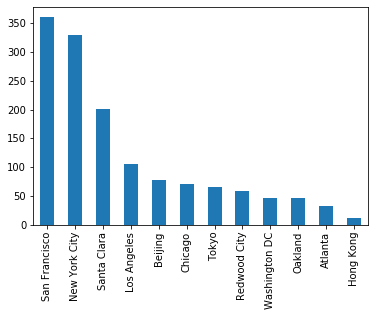

In [44]:
df["Location"].value_counts().plot(kind="bar")

In [30]:
for i in loop:
    temp = df[df["Location"] == i]["Catagory"].value_counts()
    temp2 = df[df["Location"] == i]["Rating (Num)"].value_counts()
    print(i)
    print(temp2)
    print("Total Students: ", end="")
    print(temp2.sum())
    print(df[df["Location"] == i]["Rating (Num)"].astype(int).mean())
    print()

San Francisco
10    101
8      95
9      93
7      40
6      17
5       6
3       4
4       3
2       1
Name: Rating (Num), dtype: int64
Total Students: 360
8.458333333333334

New York City
8     98
10    84
9     75
7     38
6     16
5      9
3      3
4      3
1      2
0      1
2      1
Name: Rating (Num), dtype: int64
Total Students: 330
8.275757575757575

Santa Clara
8     72
9     64
10    29
7     23
5      7
6      5
4      1
Name: Rating (Num), dtype: int64
Total Students: 201
8.318407960199005

Los Angeles
10    35
9     33
8     25
7      8
6      3
5      1
4      1
Name: Rating (Num), dtype: int64
Total Students: 106
8.773584905660377

Beijing
10    27
9     26
8     19
7      6
Name: Rating (Num), dtype: int64
Total Students: 78
8.948717948717949

Chicago
9     20
8     17
10    17
7     12
6      4
Name: Rating (Num), dtype: int64
Total Students: 70
8.485714285714286

Tokyo
10    22
8     13
9     11
7     10
4      3
6      3
5      2
3      1
Name: Rating (Num), dtype: i

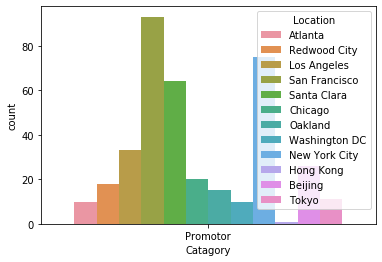

In [20]:
sns.countplot(x='Catagory', hue="Location", data=df[df["Catagory"] == "Promotor"])

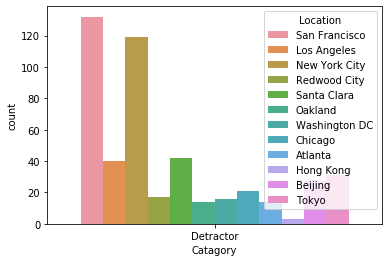

In [21]:
sns.countplot(x='Catagory', hue="Location", data=df[df["Catagory"] == "Detractor"])

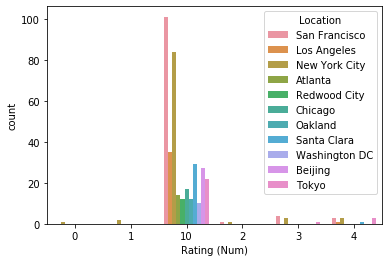

In [22]:
sns.countplot(x='Rating (Num)', hue="Location", data=df[(df["Rating (Num)"] >= '0') & (df["Rating (Num)"] <= '4')])

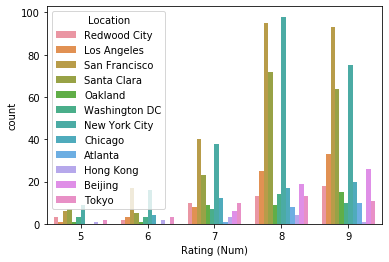

In [23]:
sns.countplot(x='Rating (Num)', hue="Location", data=df[(df["Rating (Num)"] >= '5') & (df["Rating (Num)"] <= '9')])

In [25]:
def runRatePlot(location):
    return df[df["Location"] == location]["Rating (Num)"].value_counts().plot(kind="bar")

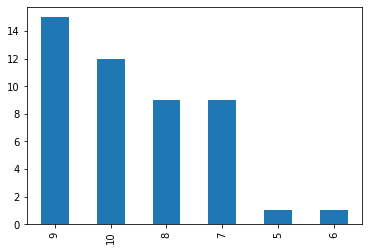

In [26]:
runRatePlot("Oakland")

 It does, but no location has under 7 average rating, and most are about +/- 1 point around an average of 8.


## What are things we could find here that could “help the business”? What sorts of information does this dataset contain?

In [27]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Catagory
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Detractor
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Detractor
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor


### What kinds of questions might we be able to answer with this data?

How well the course is paced.
How satisfied people are with the course.
The NPS of the course.
Where the majority of students reside.
How location corralates to satisfaction and schedule pacing.
What students think of the courses pacing?
How ratings vary between the week of the course.
How pacing varies between weeks of the course.
How rating/pacing varies between tracks.
How location correlates to track.

### What kinds of questions can’t we answer with this data?

Why are people satisfied/not satisfied? What are the characteristics of the people taking the course? Did they answer honestly? Any question related to the people behind the survey or the quality of the course itself.